#  let's make sure you've got the datasets

we are basically dealing with shapefiles (.shp). They should be at the folder project/data. Here it goes the urls we need:

trees:
https://data.cityofnewyork.us/Environment/2015-Street-Tree-Census-Tree-Data/pi5s-9p35/data

neighbourhoods:
https://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/nynta_17a.zip

streets base lines:
https://data.cityofnewyork.us/City-Government/NYC-Street-Centerline-CSCL-/exjm-f27b/data


# some tricks to make it easier to reload the modules while coding

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

# loading base modules 

In [2]:
import geopandas as gpd
import pandas as pd
import fiona
from shapely.geometry import Point, MultiLineString, LineString, Polygon, box
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [10,10]

# loading the datasets (takes a while to load at the first time..)

In [3]:
from functools import partial
import pyproj
from shapely.ops import transform
villagesdf = gpd.GeoDataFrame.from_file('data/nynta_17a/nynta.shp')
streets = gpd.read_file('data/cscl/geo_export_7db5438d-c515-499f-9d51-39f981ba8501.shp', driver='ESRI Shapefile')
trees = gpd.read_file('data/trees/geo_export_f822eeee-0176-4586-ada0-7a06ce492b84.shp', driver='ESRI Shapefile')

# converting CRS to UTM ( "flat" the maps, thus spatial queries get much easier)

In [4]:
villagesdf = villagesdf.to_crs(epsg=26918)
streets = streets.to_crs(epsg=26918)
trees = trees.to_crs(epsg=26918)

villagesmn = villagesdf[villagesdf.BoroCode==1]
streetsmn = streets[streets.borocode==1]
treesmn = trees[trees.borocode==1]

# plotting trees and strees at MN borough 

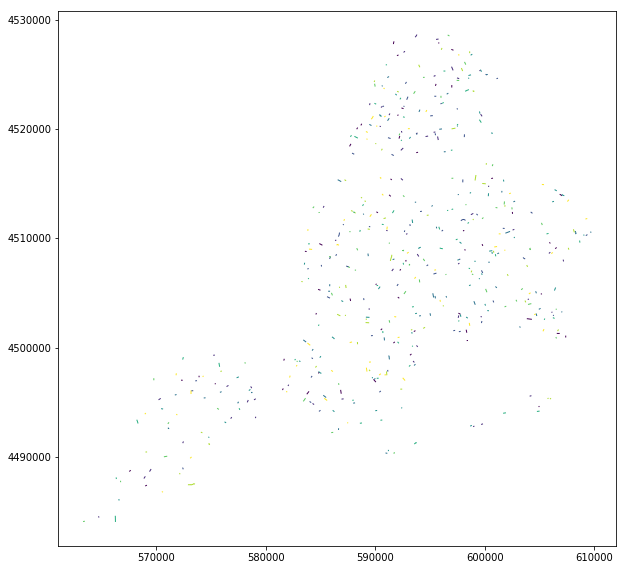

In [5]:
fig, ax = plt.subplots()
ax.set_aspect('equal')
streets.sample(500).plot(ax=ax)
# villagesdf.plot(ax=ax)